In [45]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import math

In [46]:
def alphaM(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def betaM(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

In [47]:
def alphaH(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def betaH(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)

In [48]:
def alphaN(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def betaN(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

In [66]:
I = 10
tS = 100
Ci = 1
mi = 0.0529
hi = 0.5961
ni = 0.3176
Vi = -65.002

In [67]:
dt = 0.001 
t = np.arange(0, tS, dt)

In [68]:
V = np.zeros(len(t)) 
m = np.zeros(len(t))
n = np.zeros(len(t)) 
h = np.zeros(len(t)) 
gNa = 12.0
vNa = 50.0
gK = 3.60
vK = -77.0
gL = 0.03
vL = -54.402
loop = np.arange(0, tS, dt)

In [69]:
for i in range(0, len(loop) - 1):
    m[i + 1] = m[i] + dt * (alphaM(V[i]) * (1 - m[i]) - betaM(V[i]) * m[i])
    h[i + 1] = h[i] + dt * (alphaH(V[i]) * (1 - h[i]) - betaH(V[i]) * h[i])
    n[i + 1] = n[i] + dt * (alphaN(V[i]) * (1 - n[i]) - betaN(V[i]) * n[i])
    V[i + 1] = V[i] + dt * (gNa * m[i] ** 3 * h[i] * (vNa - (V[i] + 65)) + gK * n[i] ** 4 * (vK - (V[i] + 65)) + gL * (vL - (V[i] + 65)) + I)

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

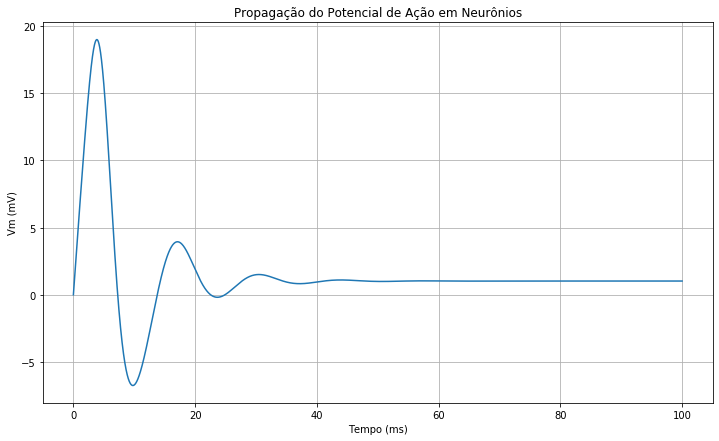

In [70]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(t, V)
ax.set_xlabel('Tempo (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Propagação do Potencial de Ação em Neurônios')
plt.grid()